# Solar Power Generation Forecast - Final
Kayla Garin
CS 458 - Fall 2020

# Introduction
The purpose of this project is to use the data from Global Energy Forecasting Competition 2014 to develop forcast models and predict a 24h ahead solar power generation on a rolling basis for three solar power plants located in a certain region of Australia. The data has been split into two files: solar_training.csv and solar_testing.csv. 

# Literature Review


https://www.brownanalytics.com/energy_forecasting/#std_pred 
Article on training data with Neural Networks. Similar to what needs to be accomplished in the project.

A Two-Step Approach to Solar Power Generation Prediction Based on Weather Data Using Machine Learning
Seul-Gi Kim, Jae-Yoon Jung and Min Kyu Sim 

Seasonal Self-evolving Neural Networks Based Short-term Wind Farm Generation Forecast

# Methods

In order to save run time, I trained the data based on the first month of each zone. I then created two sets of data. One set of data was the time period that contained data from 48 hours before the desired time periods and the other contained the actual data. To train data, I trained a linear regression model by taking the variables of data from 48 hours prior to the desired data and the power from my desired time frame. In order to select the desired times, I had to create a function called "add_date_time" so the program could accurately select the data.

# 24 h Ahead Solar Power Generation Forcast Model

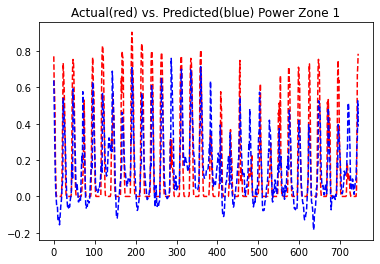

In [64]:
#
#Kayla Garin
#CS 458 
#Zone 1

import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import numpy as np

# load dataset
data = pd.read_csv("solar_training.csv")
df = pd.DataFrame(data, 
                  columns=['ZONEID','VAR78','VAR79','VAR134','VAR157','VAR164','VAR165','VAR166','VAR167', 'VAR169', 'VAR175', 'VAR178', 'POWER'])

test_data = pd.read_csv("solar_test.csv")


def rmse(actual, predicted):
    from math import sqrt
    
    return sqrt(mean_squared_error(actual, predicted))

def add_date_time(_df, startDate):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start=startDate, periods=_df.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['year'] = _df['time'].dt.year

    return _df


df = add_date_time(df, '20120401')
df = df[~df.year.isin([2011])]

test_data = add_date_time(test_data, '20130701')
test_data = test_data[~test_data.year.isin([2012])]

from sklearn.metrics import mean_squared_error

#one month of data to save run time
pastTwo = df[(df['time'] > '2012-04-01 00:00:00') & (df['time'] <= '2012-05-02 1:00:00')]

actualData = df[(df['time'] > '2012-04-02 00:00:00') & (df['time'] <= '2012-05-03 1:00:00')]
pastTwo_target = actualData.POWER

pastTwo = pastTwo.drop(['time', 'POWER'], axis=1)

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

loo = LeaveOneOut()
loo.get_n_splits(pastTwo)

train_r2_scores = np.array([])
test_r2_scores = np.array([])
train_rmse_scores = np.array([])
test_rmse_scores = np.array([])
predicted_powers = np.array([])
actual_powers = np.array([])


averageMAEz1 = 0; #zone 1 average MAE initialization
averageRMSEz1 = 0; #zone 1 average RMSE initialization
# Train Linear Regression model
for train_index, test_index in loo.split(pastTwo):
    regr = LinearRegression()
    
    X_train, X_test = pastTwo.iloc[train_index], pastTwo.iloc[test_index]
    y_train, y_test = pastTwo_target.iloc[train_index], pastTwo_target.iloc[test_index]
    regr.fit(X_train, y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    
    actual_powers = np.append(actual_powers, y_test.values[0])
    predicted_powers = np.append(predicted_powers, y_test_pred[0])
    
    averageMAEz1 += mean_absolute_error(actual_powers,predicted_powers)
    averageRMSEz1 += rmse(actual_powers, predicted_powers)

plt.title('Actual(red) vs. Predicted(blue) Power Zone 1')
plt.plot(actual_powers, 'r--', predicted_powers, 'b--')
plt.show()


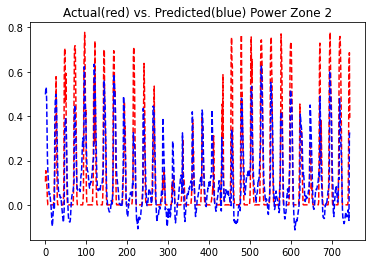

In [65]:
#Zone 2

# load dataset
data = pd.read_csv("solar_test.csv", skipfooter=19704, engine = 'python') #skip footer to keep only zone 2
df = pd.DataFrame(data, 
                  columns=['VAR78','VAR79','VAR134','VAR157','VAR164','VAR165','VAR166','VAR167', 'VAR169', 'VAR175', 'VAR178', 'POWER'])

df = add_date_time(df, '20120401')
df = df[~df.year.isin([2011])]

#one month of data to save run time
pastTwo = df[(df['time'] > '2012-04-01 00:00:00') & (df['time'] <= '2012-05-02 1:00:00')] 

actualData = df[(df['time'] > '2012-04-02 00:00:00') & (df['time'] <= '2012-05-03 1:00:00')]
pastTwo_target = actualData.POWER

pastTwo = pastTwo.drop(['time', 'POWER'], axis=1)

loo = LeaveOneOut()
loo.get_n_splits(pastTwo)

train_r2_scores = np.array([])
test_r2_scores = np.array([])
train_rmse_scores = np.array([])
test_rmse_scores = np.array([])
predicted_powers = np.array([])
actual_powers = np.array([])

averageMAEz2 = 0; #zone 2 average MAE initialization
averageRMSEz2 = 0; #zone 2 average RMSE initialization

# Train Linear Regression model
for train_index, test_index in loo.split(pastTwo):
    regr = LinearRegression()
    
    X_train, X_test = pastTwo.iloc[train_index], pastTwo.iloc[test_index]
    y_train, y_test = pastTwo_target.iloc[train_index], pastTwo_target.iloc[test_index]
    regr.fit(X_train, y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    
    actual_powers = np.append(actual_powers, y_test.values[0])
    predicted_powers = np.append(predicted_powers, y_test_pred[0])
    
    averageMAEz2 += mean_absolute_error(actual_powers,predicted_powers)
    averageRMSEz2 += rmse(actual_powers, predicted_powers)

plt.title('Actual(red) vs. Predicted(blue) Power Zone 2')
plt.plot(actual_powers, 'r--', predicted_powers, 'b--')
plt.show()


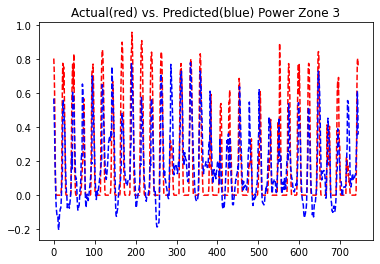

In [66]:
#Zone 3

# load dataset
data = pd.read_csv("solar_test.csv", skiprows = [i for i in range(1,28465)]) #skip rows to keep only zone 3
df = pd.DataFrame(data, 
                  columns=['VAR78','VAR79','VAR134','VAR157','VAR164','VAR165','VAR166','VAR167', 'VAR169', 'VAR175', 'VAR178', 'POWER'])

df = add_date_time(df, '20120401')
df = df[~df.year.isin([2011])]

#one month of data to save run time
pastTwo = df[(df['time'] > '2012-04-01 01:00:00') & (df['time'] <= '2012-05-02 2:00:00')] 

actualData = df[(df['time'] > '2012-04-02 01:00:00') & (df['time'] <= '2012-05-03 2:00:00')]
pastTwo_target = actualData.POWER

pastTwo = pastTwo.drop(['time', 'POWER'], axis=1)

loo = LeaveOneOut()
loo.get_n_splits(pastTwo)

train_r2_scores = np.array([])
test_r2_scores = np.array([])
train_rmse_scores = np.array([])
test_rmse_scores = np.array([])
predicted_powers = np.array([])
actual_powers = np.array([])

averageMAEz3 = 0; #zone 3 average MAE initialization
averageRMSEz3 = 0; #zone 3 average RMSE initialization

# Train Linear Regression model
for train_index, test_index in loo.split(pastTwo):
    regr = LinearRegression()
    
    X_train, X_test = pastTwo.iloc[train_index], pastTwo.iloc[test_index]
    y_train, y_test = pastTwo_target.iloc[train_index], pastTwo_target.iloc[test_index]
    regr.fit(X_train, y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    
    actual_powers = np.append(actual_powers, y_test.values[0])
    predicted_powers = np.append(predicted_powers, y_test_pred[0])
    
    averageMAEz3 += mean_absolute_error(actual_powers,predicted_powers)
    averageRMSEz3 += rmse(actual_powers, predicted_powers)

plt.title('Actual(red) vs. Predicted(blue) Power Zone 3')
plt.plot(actual_powers, 'r--', predicted_powers, 'b--')
plt.show()


# Evaluation Results

The main pro of the prediction model is that it is more on the simple side. At first, I tried to find ways to predict the power by predicting what the variables would be 24h in the future and then using a formula to calculate the power. The con of the prediction model is that it relies on data that the predicted amount solar generation can be extrememly off from the actual amount of solar generation because it calculates the power based on past conditions rather than predicted current ones.

In [67]:
print ("Zone ID 1:")
print ("Average MAE of Zone 1 Data: ", averageMAEz1/25)
print ("Average RMSE of Zone 1 Data", averageRMSEz1/25)

print ("Zone ID 2:")
print ("Average MAE of Zone 1 Data: ", averageMAEz2/25)
print ("Average RMSE of Zone 1 Data", averageRMSEz2/25)

print ("Zone ID 3:")
print ("Average MAE of Zone 1 Data: ", averageMAEz3/25)
print ("Average RMSE of Zone 1 Data", averageRMSEz3/25)

Zone ID 1:
Average MAE of Zone 1 Data:  3.5387663926561124
Average RMSE of Zone 1 Data 4.9012766672673305
Zone ID 2:
Average MAE of Zone 1 Data:  3.0324348786052924
Average RMSE of Zone 1 Data 4.224063047422
Zone ID 3:
Average MAE of Zone 1 Data:  4.010998343489361
Average RMSE of Zone 1 Data 5.294017174116479


# Conclusion

The results of my predictions were not bad, but they can definitely be improved. I could train the data using the entire time frame instead of just a selected one. While listening through presentations of other students, I did like the methods others used as well such as training it using the Baysian Ridge Model and KNN. This project has definitely taught me many things such as real life applications of data mining and prediction.